Test of the embedded passes! 

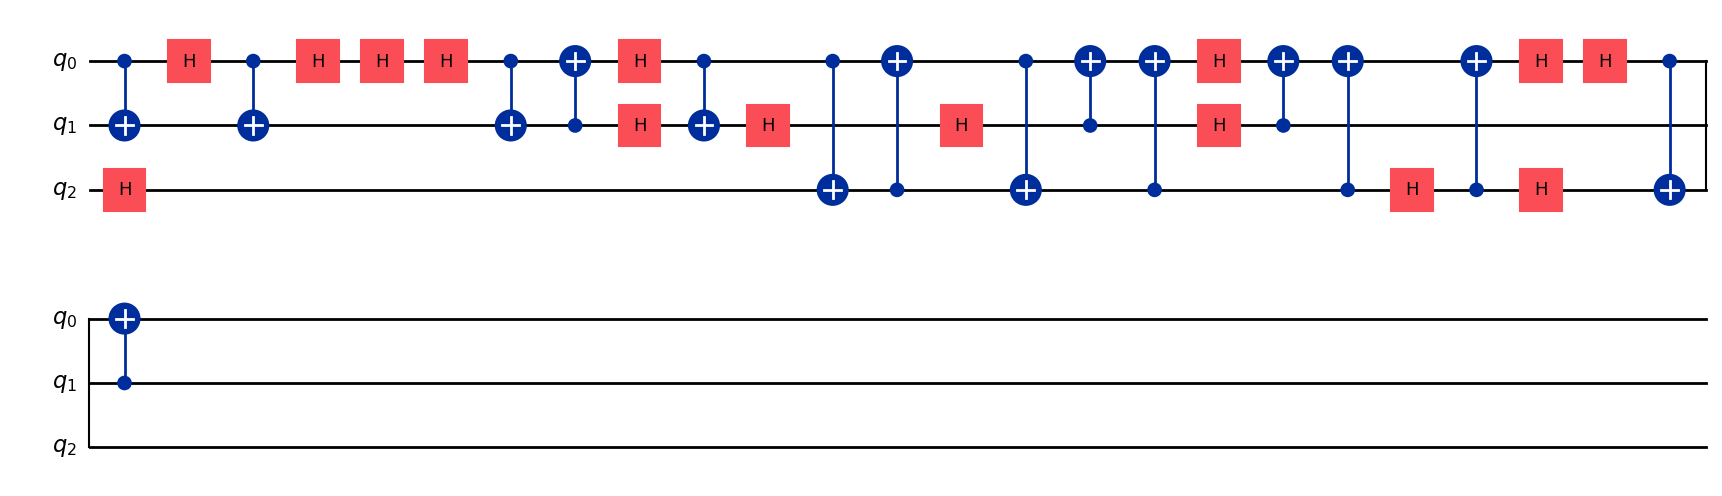

In [1]:
import random
import qiskit.circuit.random

QUBIT_COUNT = 3
NUM_GATES = 30
SEED=223
random.seed(SEED)

MAX_OPERANDS = 2

STANDARD_GATE_SET = ["cx", "h"]



random_broken_circuit = qiskit.circuit.random.random_clifford_circuit(QUBIT_COUNT, NUM_GATES, STANDARD_GATE_SET, seed=SEED)

random_broken_circuit.draw('mpl')

Let's generate the backend then.

In [10]:
import qiskit_ibm_runtime.fake_provider 
import networkx as nx
import quariadne.circuit

manila_backend = qiskit_ibm_runtime.fake_provider.FakeManilaV2()
coupling_graph = manila_backend.coupling_map.graph
coupling_graph

Now, let's test the exposed passmanagers. 

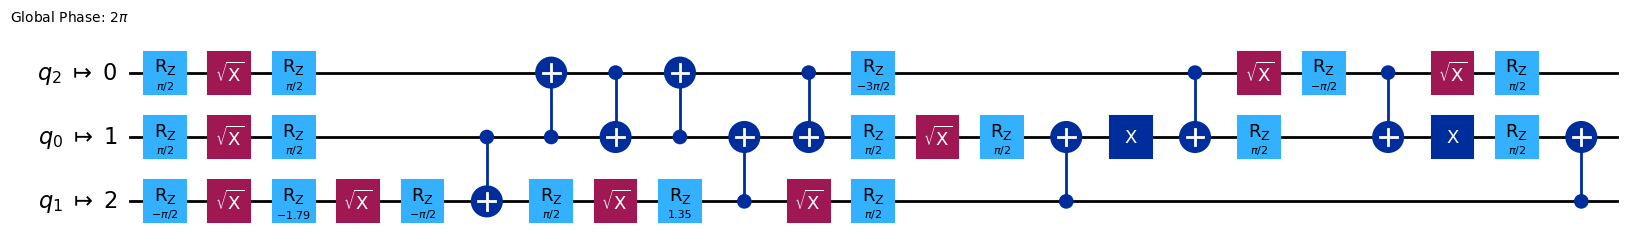

In [11]:



basis_passmanager = qiskit.transpiler.generate_preset_pass_manager(backend=manila_backend, optimization_level=3, routing_method="quariadne_milp", layout_method="quariadne_milp")

physical = basis_passmanager.run(random_broken_circuit)
physical.draw("mpl")

And finally run it!

In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
with Session(backend=manila_backend) as session:
    # Submit a request to the Sampler primitive within the session.
    sampler = Sampler(mode=session)
    job = sampler.run([physical])
    pub_result = job.result()[0]
    print(pub_result)
 

/home/parf/projects/courses/quariadne/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/utils/validations.py:41: UserWarning: The 0-th circuit has no output classical registers so the result will be empty. Did you mean to add measurement instructions?
  warnings.warn(
/home/parf/projects/courses/quariadne/.venv/lib/python3.13/site-packages/qiskit/primitives/backend_sampler_v2.py:158: UserWarning: The 0-th pub's circuit has no output classical registers and so the result will be empty. Did you mean to add measurement instructions?
  warnings.warn(
No classical registers in circuit "circuit-166-173", counts will be empty.


SamplerPubResult(data=DataBin(), metadata={'shots': 1024, 'circuit_metadata': {}})
